# 회귀 실습 - 자전거 대여 수요 예측

- Kaggle Bike Sharing Demand 예측 경연 대회
- https://www.kaggle.com/c/bike-sharing-demand/data
- 2011.01~2012.12 날짜/시간(1시간 간격), 기온 습도, 풍속, 자전거 대여 횟수

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### 데이터 탐색

* datetime : 대여날짜 및 시간
* season : 계절
* holiday : 휴일유무
* workingday : 평일(일하는날)
* weather : 날씨
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [2]:
bike_df = pd.read_csv('../수업답안/bike_train.csv')
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bike_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### 데이터 클렌징 및 가공

**datetime 컬럼을 datetime 타입으로 변경하고 년,월,일,시 컬럼으로 추출**

In [5]:
# 문자열을 datetime 타입으로 변경. 

bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)

bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


**피처 삭제**
- 상관성이 있는 컬럼들 삭제 : 'datetime','casual','registered'

In [7]:
drop_cols=['datetime','casual','registered']

bike_df.drop(drop_cols, axis=1, inplace=True)

In [8]:
bike_df.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22
10885,4,0,1,1,13.12,16.665,66,8.9981,88,2012,12,19,23


**회귀모델 성능평가 함수 작성**

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):    
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y, pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_ = rmsle(y, pred)
    rmse_ = rmse(y, pred)
    mse_ = mean_squared_error(y, pred)
    mae_ = mean_absolute_error(y, pred)

    print('RMSLE : {0:.3f}, MSE : {1:.3f}, RMSE : {2:.3f}, MAE : {3:.3f}'.format(rmsle_, mse_, rmse_, mae_))

### (1) 피처 클렌징 후 선형회귀 모델 학습/예측/평가

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
y = bike_df['count']
X = bike_df.drop('count', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE : 1.165, MSE : 19852.694, RMSE : 140.900, MAE : 105.924


In [12]:
bike_df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

**실제 대여횟수와 예측 대여횟수 비교**

In [13]:
def get_top_error_data(y_test, pred, n_tops = 5):
    result_df = pd.DataFrame(y_test.values, columns=['Actual_count'])
    result_df['Predicted_count'] = np.round(pred, 1)
    result_df['Diff'] = np.abs(result_df['Actual_count'] - result_df['Predicted_count'])
    # 상위 
    return result_df.sort_values('Diff', ascending=False)[:n_tops]

In [14]:
get_top_error_data(y_test, pred)

,Actual_count,Predicted_count,Diff
1618,890,322.1,567.9
966,884,326.7,557.3
3151,798,241.4,556.6
412,745,193.9,551.1
2277,813,267.0,546.0


### (2) 타깃 변수 로그 변환 후 모델 학습/예측/평가

<AxesSubplot:>

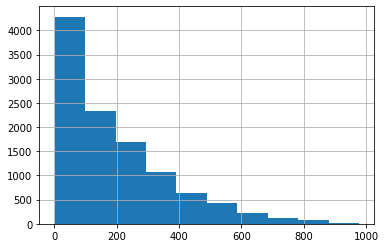

In [15]:
y.hist()

**타깃변수 로그변환**

In [18]:
np.log1p(y)

0        1.343703
1        1.550446
2        1.503301
3        1.291725
4        0.526589
           ...   
10881    1.919872
10882    1.870099
10883    1.813178
10884    1.769435
10885    1.702680
Name: count, Length: 10886, dtype: float64

**타깃 변수 로그변환 후 선형회귀 모델 학습/예측/평가(2)**

In [19]:
# 타겟 컬럼인 count 값을 log1p 로 Log 변환

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환

y = np.log1p(y)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

**회귀계수 시각화**

<AxesSubplot:>

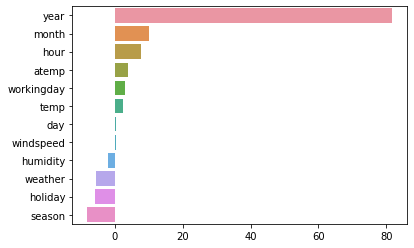

In [ ]:
coef = pd.Series(lr_reg.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x = coef_sort, y = coef_sort.index)

### (3) 피처 인코딩 후 모델 학습/예측/평가

**'year', month', 'day', hour' 피처 원-핫 인코딩**

In [ ]:
X_ohe = pd.get_dummies(X, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [ ]:
X_ohe.shape

(10886, 73)

**원-핫 인코딩 적용된 피처 데이터 기반으로 학습/예측/평가**

In [ ]:
# 학습/예측 데이터 분할 
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, random_state=0, test_size=0.3)

lr_reg = LinearRegression()

In [ ]:
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)

In [ ]:
# model 별로 평가 수행
from sklearn.linear_model import Ridge, Lasso

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE : nan, MSE : inf, RMSE : inf, MAE : 1869192620396709235127602005220585780769529026090953505763411749045051738968919173532168185125177593084495112429431412071419628692667530108425744061258218355809565928161298251476823799348534339174400.000
### Ridge ###
RMSLE : nan, MSE : inf, RMSE : inf, MAE : 1678173695179711488023150929245521350779238328626204473626913749996141315496939837985119164533011567234189977781720271299434158061712069081742494941413561421263440996536962652738592520042256309157888.000
### Lasso ###
RMSLE : nan, MSE : inf, RMSE : inf, MAE : 1983547944252252130283646840578915485666547759754645906209980619903637784628478854746202694635652051899234384147153409533738576070841239498556174573342593997591474016018548125278341265755471721005056.000


**회귀계수 시각화**

<AxesSubplot:>

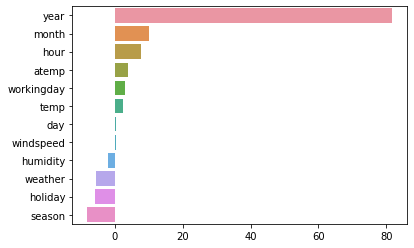

In [ ]:
coef = pd.Series(lr_reg.coef_, index = X.columns)
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x=coef_sort, y=coef_sort.index)

### 회귀트리를 이용한 예측

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators = 500)

gbm_reg = GradientBoostingRegressor(n_estimators=1000)

xgb_reg = XGBRegressor(n_estimators = 500)

lgbm_reg = LGBMRegressor(n_estimators = 500)

models = [rf_reg, gbm_reg, xgb_reg, lgbm_reg]

for model in models :
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

/opt/homebrew/Caskroom/miniforge/base/envs/multi_crawling/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### RandomForestRegressor ###


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').